In [5]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers

# Load Data

In [8]:
# Loading the dataset - on kaggle notebook

x_data = np.load('../input/273-intro-to-prac-ml-summer2021/x_data_273.npy')#需要自行修改路径
y_data = np.load('../input/273-intro-to-prac-ml-summer2021/y_data_273.npy')
x_test = np.load('../input/273-intro-to-prac-ml-summer2021/x_test_273.npy')
x_data.shape

(32000, 28, 56)

In [9]:
x_data.shape

(32000, 28, 56)

In [10]:
y_data.shape

(32000,)

In [11]:
x_test.shape

(10000, 28, 56)

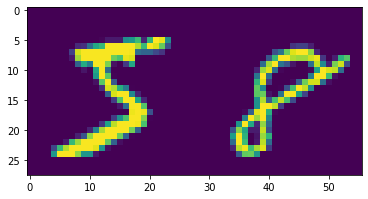

In [12]:
# The dataset comprises of 32000 samples

import matplotlib.pyplot as plt
plt.imshow(x_data[0])
# plt.savefig('header.png', dpi=300)


In [13]:
x_data2 = np.reshape(x_data, (-1, int(28*56)))
x_data2.shape

(32000, 1568)

In [14]:
# Keras CNN layers expect the input to be float

x_data3 = x_data.astype('float32')

# Expanding dimensions of x_data to match (batch_size, height, width, depth/channels)
# Even if the image is grayscale, it requires that a non-zero value is provided as the depth

x_data3 = np.expand_dims(x_data3, axis=-1)

In [15]:
x_data3.shape

(32000, 28, 56, 1)

define functions to draw the loss plot as well as the accuracy plot

In [66]:
import matplotlib.pyplot as plt
def plotacc(history):
    history_dict = history.history
    loss_values = history_dict["loss"]
    val_loss_values = history_dict["val_loss"]
    epochs = range(1, len(loss_values) + 1)
    plt.plot(epochs, loss_values, "bo", label="Training loss")
    plt.plot(epochs, val_loss_values, "b", label="Validation loss")
    plt.title("Training and validation loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.show()
    plt.clf()
    acc = history_dict["accuracy"]
    val_acc = history_dict["val_accuracy"]
    plt.plot(epochs, acc, "bo", label="Training acc")
    plt.plot(epochs, val_acc, "b", label="Validation acc")
    plt.title("Training and validation accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.legend()
    plt.show()

# Model

### Model 1 date 2021/08/06

In [71]:
# #model_01 test date 2021/08/06
model_01 = keras.Sequential([
    layers.Dense(256, activation="relu"),
    layers.Dense(128, activation="relu"),
    layers.Dense(10, activation="sigmoid")
])

model_01.build(input_shape=(None,1568))
model_01.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_32 (Dense)             (None, 256)               401664    
_________________________________________________________________
dense_33 (Dense)             (None, 128)               32896     
_________________________________________________________________
dense_34 (Dense)             (None, 10)                1290      
Total params: 435,850
Trainable params: 435,850
Non-trainable params: 0
_________________________________________________________________


In [72]:
model_01.compile(optimizer="rmsprop",
                loss="sparse_categorical_crossentropy",
                metrics=["accuracy"])

In [73]:
history1=model_01.fit(x_data2, y_data, epochs=40, batch_size=512,validation_split=0.2)

Epoch 1/40
50/50 [==============================] - 1s 15ms/step - loss: 80.8064 - accuracy: 0.2732 - val_loss: 23.3741 - val_accuracy: 0.2509
Epoch 2/40
50/50 [==============================] - 0s 4ms/step - loss: 7.1120 - accuracy: 0.4954 - val_loss: 13.9140 - val_accuracy: 0.2836
Epoch 3/40
50/50 [==============================] - 0s 4ms/step - loss: 3.0900 - accuracy: 0.5927 - val_loss: 9.1939 - val_accuracy: 0.2944
Epoch 4/40
50/50 [==============================] - 0s 4ms/step - loss: 1.8714 - accuracy: 0.6500 - val_loss: 7.5043 - val_accuracy: 0.2944
Epoch 5/40
50/50 [==============================] - 0s 4ms/step - loss: 1.2238 - accuracy: 0.7162 - val_loss: 7.5930 - val_accuracy: 0.3328
Epoch 6/40
50/50 [==============================] - 0s 4ms/step - loss: 0.9454 - accuracy: 0.7614 - val_loss: 7.2245 - val_accuracy: 0.3283
Epoch 7/40
50/50 [==============================] - 0s 4ms/step - loss: 0.7213 - accuracy: 0.8042 - val_loss: 7.6182 - val_accuracy: 0.3419
Epoch 8/40
50/50

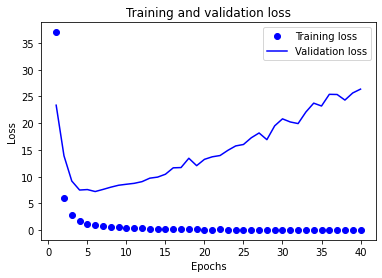

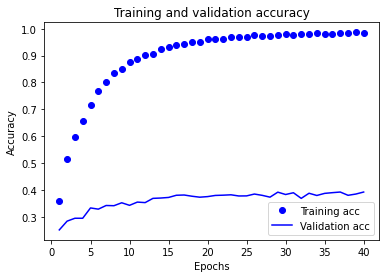

In [74]:
lossplot(history1)

**Summary1:**  
1. in model_01 we use a simple network,But The test set acc was low.   
2. We always noticed there was a big difference between training acc and validation acc,which means maybe it was overfitting here.
3. In addition,maybe we can use early stopping to avoid it.

### Model 2 date 2021/08/06

In [79]:
# model 02 CNN date 2021/08/06
model_02 = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(10, activation="sigmoid")
])
model_02.build(input_shape=(None,28,56,1))
model_02.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 54, 32)        320       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 13, 27, 32)        0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 13, 27, 32)        0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 11232)             0         
_________________________________________________________________
dense_39 (Dense)             (None, 128)               1437824   
_________________________________________________________________
dropout_7 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_40 (Dense)             (None, 10)              

In [80]:
model_02.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
history2=model_02.fit(x_data3, y_data, epochs=20,batch_size=512,validation_split=0.2)

Epoch 1/20
50/50 [==============================] - 1s 14ms/step - loss: 64.8237 - accuracy: 0.2244 - val_loss: 3.0181 - val_accuracy: 0.2108
Epoch 2/20
50/50 [==============================] - 1s 11ms/step - loss: 2.1177 - accuracy: 0.2716 - val_loss: 2.6281 - val_accuracy: 0.2128
Epoch 3/20
50/50 [==============================] - 0s 10ms/step - loss: 2.0828 - accuracy: 0.3053 - val_loss: 2.7407 - val_accuracy: 0.2741
Epoch 4/20
50/50 [==============================] - 0s 10ms/step - loss: 1.6552 - accuracy: 0.4588 - val_loss: 2.2451 - val_accuracy: 0.3680
Epoch 5/20
50/50 [==============================] - 0s 10ms/step - loss: 0.9088 - accuracy: 0.6944 - val_loss: 2.0720 - val_accuracy: 0.4125
Epoch 6/20
50/50 [==============================] - 0s 10ms/step - loss: 0.5932 - accuracy: 0.8037 - val_loss: 2.2570 - val_accuracy: 0.4094
Epoch 7/20
50/50 [==============================] - 1s 10ms/step - loss: 0.4489 - accuracy: 0.8460 - val_loss: 2.2099 - val_accuracy: 0.4220
Epoch 8/20
5

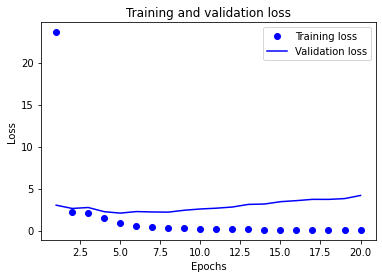

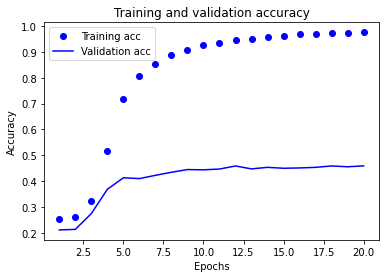

In [81]:
plotacc(history2)

**Summary2:**  
1. In model we tried to use CNN to get a better score.  
2. We noticed that maybe there still exist overfitting because the gap between validation acc and training acc still big.  
3. The vaildation acc was still low.

### Model 3 date 2021/08/07

In [90]:
#model 03 CNN date 2021/08/07
model_03 = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation='relu',kernel_regularizer=regularizers.l2(0.002)),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu',kernel_regularizer=regularizers.l2(0.002)),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation="relu",kernel_regularizer=regularizers.l2(0.002)),
    layers.Dropout(0.2),
    layers.Dense(10, activation="sigmoid")
])
model_03.build(input_shape=(None,28,56,1))
model_03.summary()

Model: "sequential_18"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 54, 32)        320       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 13, 27, 32)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 13, 27, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 11, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 5, 12, 64)         0         
_________________________________________________________________
dropout_18 (Dropout)         (None, 5, 12, 64)         0         
_________________________________________________________________
flatten_7 (Flatten)          (None, 3840)            

In [91]:
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="accuracy",
        patience=4,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )]
model_03.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
history3=model_03.fit(x_data3, y_data, epochs=40,callbacks=callbacks_list, batch_size=1024,validation_split=0.2)

Epoch 1/40
25/25 [==============================] - 1s 33ms/step - loss: 70.6160 - accuracy: 0.1983 - val_loss: 2.8187 - val_accuracy: 0.2259
Epoch 2/40
25/25 [==============================] - 1s 25ms/step - loss: 2.5487 - accuracy: 0.3596 - val_loss: 2.6305 - val_accuracy: 0.2995
Epoch 3/40
25/25 [==============================] - 1s 27ms/step - loss: 1.9774 - accuracy: 0.5161 - val_loss: 2.5390 - val_accuracy: 0.3570
Epoch 4/40
25/25 [==============================] - 1s 29ms/step - loss: 1.5302 - accuracy: 0.6547 - val_loss: 2.4500 - val_accuracy: 0.3948
Epoch 5/40
25/25 [==============================] - 1s 29ms/step - loss: 1.2411 - accuracy: 0.7375 - val_loss: 2.4107 - val_accuracy: 0.4130
Epoch 6/40
25/25 [==============================] - 1s 26ms/step - loss: 1.0297 - accuracy: 0.7884 - val_loss: 2.2711 - val_accuracy: 0.4392
Epoch 7/40
25/25 [==============================] - 1s 25ms/step - loss: 0.7836 - accuracy: 0.8415 - val_loss: 2.1345 - val_accuracy: 0.4456
Epoch 8/40
2

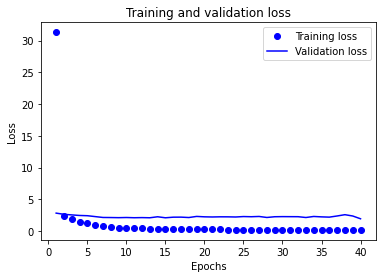

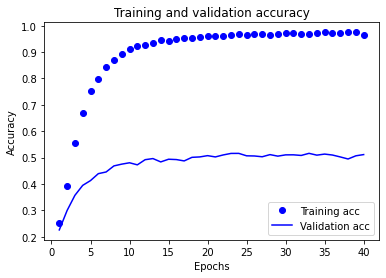

In [92]:
plotacc(history3)

**Summary3:**  
The drawback of model_03 was almost the same as model_02,  
But the improvement we made is add a callbacks_list to use early stopping.  
In addition,we also tried to use transfer learning but the acc was too low.

### Model 4 date 2021/08/07

In [100]:
#model 04 CNN date 2021/08/07
model_04 = keras.Sequential([
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(128, activation="relu",kernel_regularizer=regularizers.l2(0.002)),
    layers.Dropout(0.2),
    layers.Dense(10, activation="softmax")
])
model_04.build(input_shape=(None,28,56,1))
model_04.summary()

Model: "sequential_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 26, 54, 32)        320       
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 13, 27, 32)        0         
_________________________________________________________________
dropout_29 (Dropout)         (None, 13, 27, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 11, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 5, 12, 64)         0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 5, 12, 64)         0         
_________________________________________________________________
flatten_11 (Flatten)         (None, 3840)            

In [101]:
tensorboard = keras.callbacks.TensorBoard(
    log_dir="/content",
)
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="accuracy",
        patience=4,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    )
]
model_04.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
history4=model_04.fit(x_data3, y_data, epochs=40,callbacks=[tensorboard], batch_size=512,validation_split=0.2)

Epoch 1/40
50/50 [==============================] - 2s 25ms/step - loss: 38.3659 - accuracy: 0.2370 - val_loss: 2.4889 - val_accuracy: 0.3205
Epoch 2/40
50/50 [==============================] - 1s 14ms/step - loss: 1.6604 - accuracy: 0.5858 - val_loss: 2.3548 - val_accuracy: 0.3839
Epoch 3/40
50/50 [==============================] - 1s 14ms/step - loss: 1.1288 - accuracy: 0.7500 - val_loss: 2.1847 - val_accuracy: 0.4278
Epoch 4/40
50/50 [==============================] - 1s 14ms/step - loss: 0.7548 - accuracy: 0.8299 - val_loss: 2.1261 - val_accuracy: 0.4450
Epoch 5/40
50/50 [==============================] - 1s 14ms/step - loss: 0.5635 - accuracy: 0.8719 - val_loss: 2.0792 - val_accuracy: 0.4663
Epoch 6/40
50/50 [==============================] - 1s 15ms/step - loss: 0.4696 - accuracy: 0.8952 - val_loss: 2.1154 - val_accuracy: 0.4608
Epoch 7/40
50/50 [==============================] - 1s 14ms/step - loss: 0.3951 - accuracy: 0.9190 - val_loss: 2.0721 - val_accuracy: 0.4773
Epoch 8/40
5

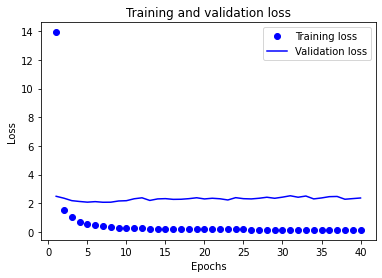

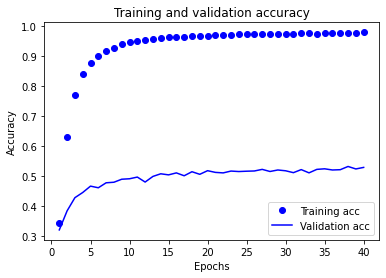

In [102]:
plotacc(history4)

**Summary4**  
In model_04 we change the activation of the output layers from sigmod to softmax.  
But the val_acc still low.  
Maybe we can tried to use data augmentation to improve the val_acc.

### Model 5 date 2021/08/07

In [109]:
#model 05 date 2021/08/07
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.Rescaling(1./255)
  ]
)
model_05 = keras.Sequent### Model 3 date 2021/08/07ial([
    data_augmentation,
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(10, activation="softmax")
])

model_05.build(input_shape=(None,28,56,1))
model_05.summary()


Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_27 (Sequential)   (None, 28, 56, 1)         0         
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 26, 54, 32)        320       
_________________________________________________________________
max_pooling2d_26 (MaxPooling (None, 13, 27, 32)        0         
_________________________________________________________________
dropout_40 (Dropout)         (None, 13, 27, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 11, 25, 64)        18496     
_________________________________________________________________
max_pooling2d_27 (MaxPooling (None, 5, 12, 64)         0         
_________________________________________________________________
dropout_41 (Dropout)         (None, 5, 12, 64)       

In [110]:
tensorboard = keras.callbacks.TensorBoard(
    log_dir="/content",
)
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="accuracy",
        patience=4,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    ),
]
model_05.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
history5=model_05.fit(x_data3, y_data, epochs=40,callbacks=[tensorboard], batch_size=512,validation_split=0.2)

Epoch 1/40
50/50 [==============================] - 2s 30ms/step - loss: 2.0923 - accuracy: 0.2053 - val_loss: 1.8403 - val_accuracy: 0.3336
Epoch 2/40
50/50 [==============================] - 1s 17ms/step - loss: 1.6851 - accuracy: 0.3816 - val_loss: 1.4356 - val_accuracy: 0.4884
Epoch 3/40
50/50 [==============================] - 1s 17ms/step - loss: 1.3596 - accuracy: 0.5151 - val_loss: 1.1924 - val_accuracy: 0.5809
Epoch 4/40
50/50 [==============================] - 1s 17ms/step - loss: 1.1436 - accuracy: 0.5980 - val_loss: 1.1992 - val_accuracy: 0.5716
Epoch 5/40
50/50 [==============================] - 1s 17ms/step - loss: 0.9952 - accuracy: 0.6504 - val_loss: 0.8971 - val_accuracy: 0.7000
Epoch 6/40
50/50 [==============================] - 1s 19ms/step - loss: 0.8473 - accuracy: 0.7050 - val_loss: 0.7996 - val_accuracy: 0.7358
Epoch 7/40
50/50 [==============================] - 1s 17ms/step - loss: 0.7524 - accuracy: 0.7389 - val_loss: 0.7877 - val_accuracy: 0.7258
Epoch 8/40
50

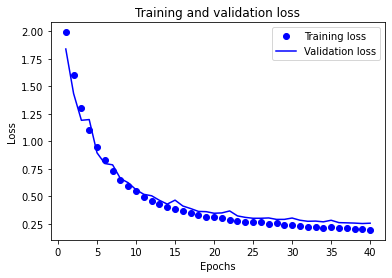

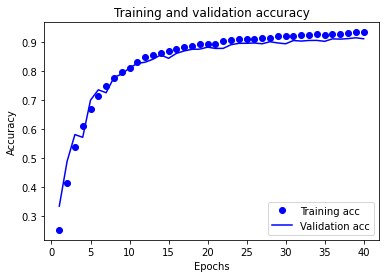

In [111]:
plotacc(history5)

**Summary5**  
In model_05 we add a data_argumentation which had a significant improvement.   
The val_acc reach 0.91 and the val_loss was decrease to 0.25.  
Maybe we can tried to add more layers or improve the data augmentation to get a better result.

### Model 6 date 2021/08/08

In [119]:
#model 06 date 2021/08/08
data_augmentation = keras.Sequential(
  [### Model 3 date 2021/08/07
#   layers.experimental.preprocessing.RandomFlip("horizontal"),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.Rescaling(1./255)
#   layers.experimental.preprocessing.RandomContrast(0.2),
  ]
)
model_06 = keras.Sequential([
    data_augmentation,
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(10, activation="softmax")
])

model_06.build(input_shape=(None,28,56,1))
model_06.summary()


Model: "sequential_36"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_35 (Sequential)   (None, 28, 56, 1)         0         
_________________________________________________________________
conv2d_44 (Conv2D)           (None, 26, 54, 32)        320       
_________________________________________________________________
conv2d_45 (Conv2D)           (None, 24, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_38 (MaxPooling (None, 12, 26, 32)        0         
_________________________________________________________________
dropout_56 (Dropout)         (None, 12, 26, 32)        0         
_________________________________________________________________
conv2d_46 (Conv2D)           (None, 10, 24, 64)        18496     
_________________________________________________________________
conv2d_47 (Conv2D)           (None, 8, 22, 64)       

In [121]:
tensorboard = keras.callbacks.TensorBoard(
    log_dir="/content",
)
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="accuracy",
        patience=4,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    ),
    keras.callbacks.ModelCheckpoint(
            filepath="fine_tuning.keras",
            save_best_only=True,
            monitor="val_loss")
]
model_06.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
history6=model_06.fit(x_data3, y_data, epochs=80,callbacks=[tensorboard], batch_size=512,validation_split=0.2)

Epoch 1/80
50/50 [==============================] - 3s 39ms/step - loss: 2.1152 - accuracy: 0.1940 - val_loss: 1.8460 - val_accuracy: 0.3025
Epoch 2/80
50/50 [==============================] - 1s 27ms/step - loss: 1.7821 - accuracy: 0.3533 - val_loss: 1.5043 - val_accuracy: 0.4516
Epoch 3/80
50/50 [==============================] - 1s 28ms/step - loss: 1.3903 - accuracy: 0.5070 - val_loss: 1.1082 - val_accuracy: 0.6108
Epoch 4/80
50/50 [==============================] - 1s 27ms/step - loss: 1.0510 - accuracy: 0.6438 - val_loss: 0.9405 - val_accuracy: 0.6753
Epoch 5/80
50/50 [==============================] - 1s 27ms/step - loss: 0.8301 - accuracy: 0.7166 - val_loss: 0.7709 - val_accuracy: 0.7353
Epoch 6/80
50/50 [==============================] - 1s 27ms/step - loss: 0.6457 - accuracy: 0.7829 - val_loss: 0.6692 - val_accuracy: 0.7688
Epoch 7/80
50/50 [==============================] - 1s 27ms/step - loss: 0.5505 - accuracy: 0.8156 - val_loss: 0.5300 - val_accuracy: 0.8278
Epoch 8/80
50

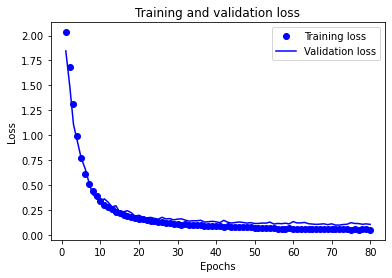

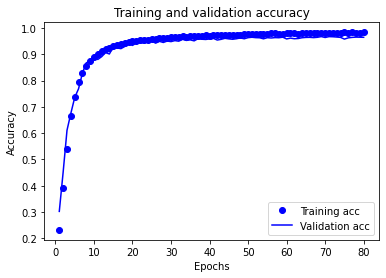

In [122]:
plotacc(history6)

**Summary6**  
In model 6 we add more Convolution layers and got a better result.  
We also change the epochs from 40 to 80.  
The val_acc improved from 0.91 to 0.96,  
The val_loss decreased from 0.25 to 0.1.

### Model 7 date 2021/08/09

In [130]:
# model 07 date 2021/08/09
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
    layers.experimental.preprocessing.Rescaling(1./255)
  ]
)
model_07 = keras.Sequential([
    data_augmentation,
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(256, activation="relu"),
    layers.Dense(10, activation="softmax")
])

model_07.build(input_shape=(None,28,56,1))
model_07.summary()


Model: "sequential_42"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_41 (Sequential)   (None, 28, 56, 1)         0         
_________________________________________________________________
conv2d_59 (Conv2D)           (None, 26, 54, 32)        320       
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 24, 52, 32)        9248      
_________________________________________________________________
max_pooling2d_47 (MaxPooling (None, 12, 26, 32)        0         
_________________________________________________________________
dropout_68 (Dropout)         (None, 12, 26, 32)        0         
_________________________________________________________________
conv2d_61 (Conv2D)           (None, 10, 24, 64)        18496     
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 8, 22, 64)       

In [131]:
tensorboard = keras.callbacks.TensorBoard(
    log_dir="/content",
)
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="accuracy",
        patience=4,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    ),
    keras.callbacks.ModelCheckpoint(
            filepath="fine_tuning.keras",
            save_best_only=True,
            monitor="val_loss")
]
model_07.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
history7=model_07.fit(x_data3, y_data, epochs=80,callbacks=[tensorboard], batch_size=1024,validation_split=0.2)

Epoch 1/80
25/25 [==============================] - 3s 77ms/step - loss: 2.1554 - accuracy: 0.1775 - val_loss: 2.0335 - val_accuracy: 0.2456
Epoch 2/80
25/25 [==============================] - 1s 53ms/step - loss: 2.0169 - accuracy: 0.2358 - val_loss: 1.8560 - val_accuracy: 0.2761
Epoch 3/80
25/25 [==============================] - 1s 51ms/step - loss: 1.8082 - accuracy: 0.3374 - val_loss: 1.9299 - val_accuracy: 0.3664
Epoch 4/80
25/25 [==============================] - 1s 51ms/step - loss: 1.6268 - accuracy: 0.4300 - val_loss: 1.3176 - val_accuracy: 0.5481
Epoch 5/80
25/25 [==============================] - 1s 51ms/step - loss: 1.3737 - accuracy: 0.5181 - val_loss: 1.1416 - val_accuracy: 0.6056
Epoch 6/80
25/25 [==============================] - 1s 51ms/step - loss: 1.1736 - accuracy: 0.5959 - val_loss: 1.1343 - val_accuracy: 0.6087
Epoch 7/80
25/25 [==============================] - 1s 51ms/step - loss: 1.0430 - accuracy: 0.6440 - val_loss: 0.9682 - val_accuracy: 0.6861
Epoch 8/80
25

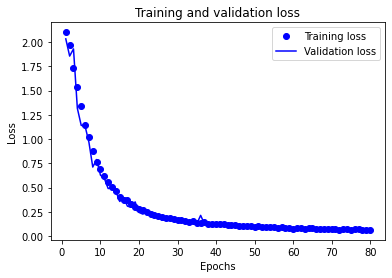

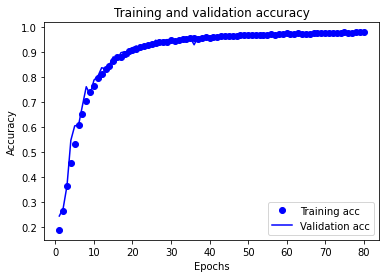

In [133]:
plotacc(history7)

**Summary7**  
In model_07,we improve data arguementation by using randomzoom,  
as well as change the batch_size from 512 to 1024,  
and improve callback by using fine tuning.  
The val_acc increased to 0.9789,val_loss decreased to 0.06.

### Model 8 date 2021/08/10

In [128]:
#model 08 date 2021/08/10
data_augmentation = keras.Sequential(### Model 3 date 2021/08/07
  [
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.2),  
  ]
)
model_08 = keras.Sequential([
    data_augmentation,
    layers.experimental.preprocessing.Rescaling(1./255),
    layers.Conv2D(filters=32, kernel_size=3, activation='relu'),
    layers.Conv2D(filters=64, kernel_size=3, activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Conv2D(filters=128, kernel_size=3, activation='relu'),
    layers.Conv2D(filters=256, kernel_size=3, activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Conv2D(filters=512, kernel_size=3, activation='relu'),
    layers.MaxPool2D(),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(1024, activation="relu"),
    layers.Dropout(0.2),
    layers.Dense(10, activation="softmax")
])
model_08.build(input_shape=(None,28,56,1))
model_08.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_39 (Sequential)   (None, 28, 56, 1)         0         
_________________________________________________________________
rescaling_8 (Rescaling)      (None, 28, 56, 1)         0         
_________________________________________________________________
conv2d_54 (Conv2D)           (None, 26, 54, 32)        320       
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 24, 52, 64)        18496     
_________________________________________________________________
max_pooling2d_44 (MaxPooling (None, 12, 26, 64)        0         
_________________________________________________________________
dropout_64 (Dropout)         (None, 12, 26, 64)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 10, 24, 128)     

In [129]:
tensorboard = keras.callbacks.TensorBoard(
    log_dir="/content",
)
callbacks_list = [
    keras.callbacks.EarlyStopping(
        monitor="accuracy",
        patience=4,
    ),
    keras.callbacks.ModelCheckpoint(
        filepath="checkpoint_path.keras",
        monitor="val_loss",
        save_best_only=True,
    ),
    keras.callbacks.ModelCheckpoint(
            filepath="fine_tuning.keras",
            save_best_only=True,
            monitor="val_loss")
]
model_08.compile(optimizer="rmsprop",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"])
history8=model_08.fit(x_data3, y_data, epochs=80,callbacks=[tensorboard], batch_size=1024,validation_split=0.2)

Epoch 1/80
25/25 [==============================] - 7s 150ms/step - loss: 2.6559 - accuracy: 0.1804 - val_loss: 2.0475 - val_accuracy: 0.1944
Epoch 2/80
25/25 [==============================] - 3s 113ms/step - loss: 2.0438 - accuracy: 0.2130 - val_loss: 1.8861 - val_accuracy: 0.3142
Epoch 3/80
25/25 [==============================] - 3s 113ms/step - loss: 1.9629 - accuracy: 0.2942 - val_loss: 1.8986 - val_accuracy: 0.3183
Epoch 4/80
25/25 [==============================] - 3s 112ms/step - loss: 1.8252 - accuracy: 0.3485 - val_loss: 1.6487 - val_accuracy: 0.4062
Epoch 5/80
25/25 [==============================] - 3s 112ms/step - loss: 1.5451 - accuracy: 0.4563 - val_loss: 1.5572 - val_accuracy: 0.5081
Epoch 6/80
25/25 [==============================] - 3s 113ms/step - loss: 1.2988 - accuracy: 0.5565 - val_loss: 0.9689 - val_accuracy: 0.7013
Epoch 7/80
25/25 [==============================] - 3s 113ms/step - loss: 1.0183 - accuracy: 0.6616 - val_loss: 0.6148 - val_accuracy: 0.8020
Epoch 

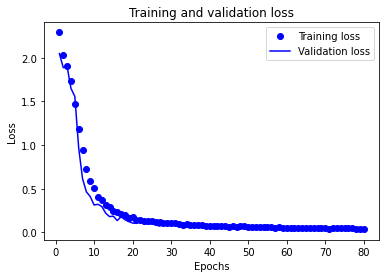

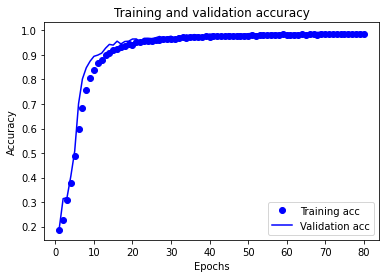

In [132]:
plotacc(history8)

**Summary8**  
In this model,we change the filters of Convolution layer,  
which had a little improvement.  
The val_acc improve to 0.99,val_loss decrease to 0.02.

# Save the prediction

In [ ]:
x_test3 = x_test.astype('float32')
x_test3 = np.expand_dims(x_test3, axis=-1)
# use model_08 for prediction
y_predict = model_08.predict(x_test3)

In [ ]:
df_predictions = pd.DataFrame(y_predict, columns=['solution_' + str(i) for i in range(10)])
df_predictions.index.rename('Id', inplace=True)
df_predictions[0:15]

In [ ]:
df_predictions.to_csv('df_predictions.csv')